# Setup

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Q3

In [3]:
def filter_2d(image, kernel):
    """
    Convolves an image with the kernel, applying zero-padding to maintain the size of the image.

    Parameters
    ----------
    image: ndarray
        2D array, representing a grayscale image.
    kernel: ndarray
        2D array, representing a linear kernel.
    Returns
    -------
    ndarray
        The result of convolving `image` with `kernel`.
    """
    result = np.zeros(image.shape)
    
    def check_inside(x: int, y: int, width: int, height: int):
        return width > x >= 0 and height > y >= 0
    
    # Without loss of generality we consider kernel sizes are odd numbers
    a = (kernel.shape[1] - 1) // 2
    b = (kernel.shape[0] - 1) // 2
    width = image.shape[1] # x axis
    height = image.shape[0] # y axis
    
    for y in range(height):
        for x in range(width):
            if x == 0 or y == 0 or x == width - 1 or y == height - 1:
                continue
            for s in range(-a, a + 1): # x axis
                for t in range(-b, b + 1): # y axis
                    image_value = image[y - t][x - s] if check_inside(x - s, y - t, width, height) else 0 # zero padding
                    result[y][x] += kernel[t + b][s + a] * image_value
    return np.rint(result).astype(np.int32)

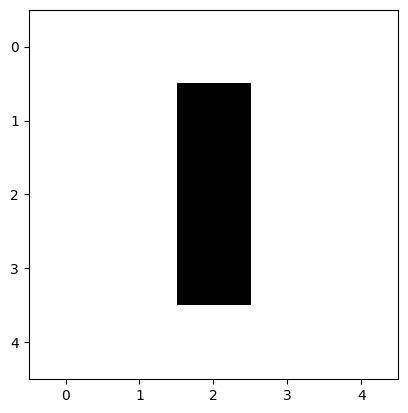

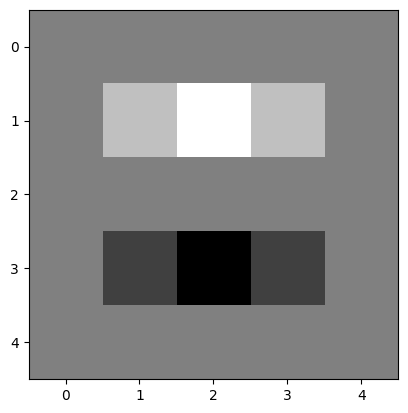

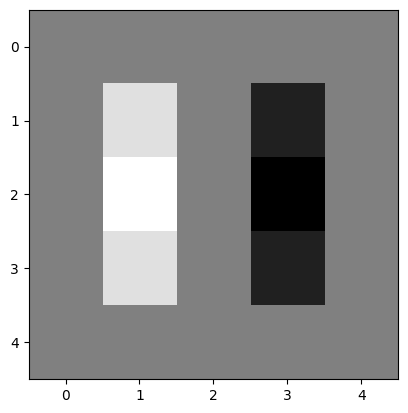

[[0.         0.         0.         0.         0.        ]
 [0.         3.16227766 2.         3.16227766 0.        ]
 [0.         4.         0.         4.         0.        ]
 [0.         3.16227766 2.         3.16227766 0.        ]
 [0.         0.         0.         0.         0.        ]]


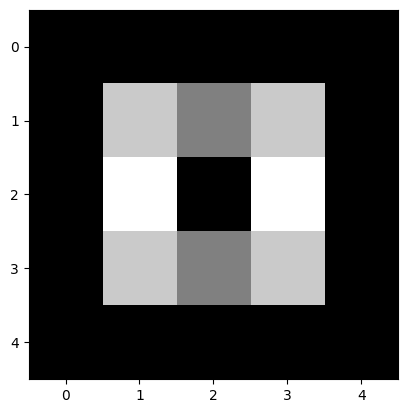

In [7]:
img = np.ones((5, 5))
for i in range(1, 4): 
    img[i][2] = 0
plt.imshow(img, cmap="gray")
plt.show()

sobel_x_kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
])

sobel_y_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

x_edge = filter_2d(img, sobel_x_kernel)
plt.imshow(x_edge, cmap="gray")
plt.show()

y_edge = filter_2d(img, sobel_y_kernel)
plt.imshow(y_edge, cmap="gray")
plt.show()

sobel_abs = np.array([[math.sqrt(x_edge[i][j]**2 + y_edge[i][j]**2) for j in range(5)] for i in range(5)])
print(sobel_abs)
plt.imshow(sobel_abs, cmap="gray")
plt.show()